<a href="https://colab.research.google.com/github/malinphy/MNIST_digits/blob/main/MNIST_DIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from sklearn.preprocessing import LabelBinarizer 

In [2]:
(X_train,y_train),(X_test,y_test) =  tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [3]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [4]:
LB = LabelBinarizer()
binarized_test = LB.fit_transform(y_test)
binarized_train = LB.fit_transform(y_train)

In [5]:
X_train.shape, X_test.shape, binarized_test.shape, binarized_train.shape

((60000, 28, 28), (10000, 28, 28), (10000, 10), (60000, 10))

In [6]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

(5.0, <matplotlib.image.AxesImage at 0x7fc4c3b176a0>)

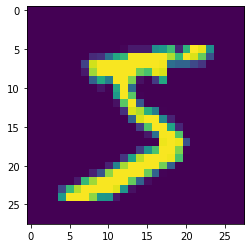

In [7]:
y_train[0],plt.imshow(X_train[0,:,:])

In [8]:
np.max(X_test), np.min(X_test), np.min(X_train),np.max(X_train)

(255.0, 0.0, 0.0, 255.0)

In [9]:
np.unique(y_train)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [10]:
tf_model = Sequential()
tf_model.add(Flatten(input_shape = (28,28)))
tf_model.add(Dense(256,activation = 'relu'))
tf_model.add(Dense(10,activation = 'sigmoid'))

In [11]:
tf_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']


)

In [12]:
res = tf_model.fit(X_train,binarized_train,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.9115
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.9506
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0358 - accuracy: 0.9575
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9604
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0325 - accuracy: 0.9609
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0286 - accuracy: 0.9657
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0279 - accuracy: 0.9676
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0263 - accuracy: 0.9681
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0238 - accuracy: 0.9716
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.023

In [13]:
model_acc = res.history['accuracy']
model_loss  = res.history['loss']

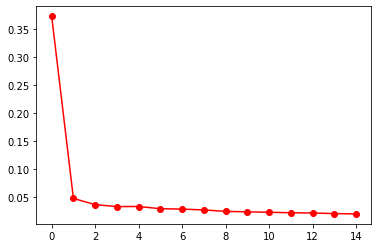

In [14]:
plt.plot(model_loss,'-or')

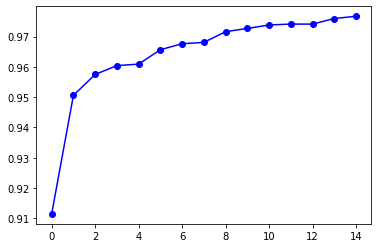

In [15]:
plt.plot(model_acc,'-ob')

In [16]:
binarized_pred = tf_model.predict(X_test)

In [17]:
y_pred = np.argmax(binarized_pred , axis =1 )

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [19]:
CM = confusion_matrix(y_test,y_pred)
CM

array([[ 974,    0,    0,    1,    0,    0,    0,    1,    4,    0],
       [   0, 1116,    3,    3,    0,    2,    0,    0,    9,    2],
       [   4,    2,  979,    9,    2,    2,    2,    9,   22,    1],
       [   2,    0,    3,  979,    0,    5,    0,    5,   15,    1],
       [   4,    1,    0,    0,  937,    0,    9,    4,   10,   17],
       [   6,    1,    0,   20,    0,  828,    6,    4,   25,    2],
       [  15,    4,    1,    0,    4,    6,  911,    0,   17,    0],
       [   1,    4,   11,    4,    3,    0,    0,  989,    5,   11],
       [   4,    1,    3,   11,    5,    5,    1,    2,  938,    4],
       [   2,    5,    1,    5,   14,    9,    0,    7,   12,  954]])

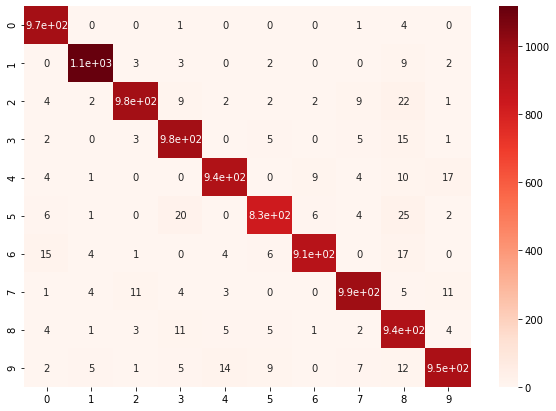

In [21]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix (y_test,y_pred), annot = True, cmap=plt.cm.Reds )